## Regresja

In [1]:
import pandas as pd
bike_data_raw = pd.read_csv('daily-bike-share.csv')
bike_data_raw

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364


In [2]:
bike_data_raw['dteday'] = pd.to_datetime(bike_data_raw['dteday'])
display(bike_data_raw)
print(bike_data_raw.info())

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  rentals     731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(9)
memory usage: 80.1 KB
None


In [3]:
bike_data = bike_data_raw.copy()
bike_data.drop(['instant', 'dteday', 'yr'], axis=1, inplace=True)
display(bike_data)

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82
...,...,...,...,...,...,...,...,...,...,...,...
726,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247
727,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644
728,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159
729,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364


In [4]:
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit']
target = 'rentals'

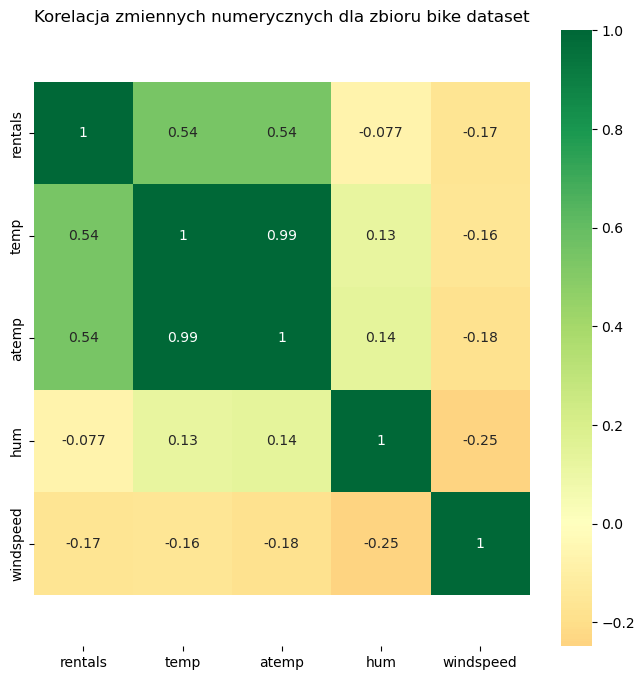

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 8))
ax = sns.heatmap(bike_data[[target]+numeric_features].corr(),
                 xticklabels=bike_data[[target]+numeric_features].corr().columns,
                 yticklabels=bike_data[[target]+numeric_features].corr().columns,
                 cmap='RdYlGn',
                 center=0,
                 annot=True)

plt.title('Korelacja zmiennych numerycznych dla zbioru bike dataset', fontsize=12)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, shuffle=False)

from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [8]:
# Podział na zmienne objaśniające i zmienną objaśnianą
X = bike_data[numeric_features].copy()
y = bike_data[target].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
pca = PCA(random_state=42)
X_train_pca = pca.fit_transform(X_train_scaler)
train_bike = pd.DataFrame(np.concatenate([X_train_pca,
                          np.array(y_train).reshape(-1, 1)],
                          axis=1))
train_bike.rename(columns = {0: 'PC1', 1: 'PC2',
                             2: 'PC3', 3: 'PC4', 4: 'rentals'},
                  inplace=True)
train_bike[['PC1', 'PC2','PC3','PC4']] = train_bike[['PC1', 'PC2','PC3', 'PC4']].astype(float)
train_bike.corr()

,PC1,PC2,PC3,PC4,rentals
PC1,1.000000e+00,1.872071e-16,8.279371e-17,-8.914886e-17,-0.496692
PC2,1.872071e-16,1.000000e+00,5.074065e-17,-1.952239e-16,0.195828
PC3,8.279371e-17,5.074065e-17,1.000000e+00,-1.350556e-16,-0.180304
PC4,-8.914886e-17,-1.952239e-16,-1.350556e-16,1.000000e+00,-0.000654
rentals,-4.966925e-01,1.958282e-01,-1.803036e-01,-6.540878e-04,1.000000


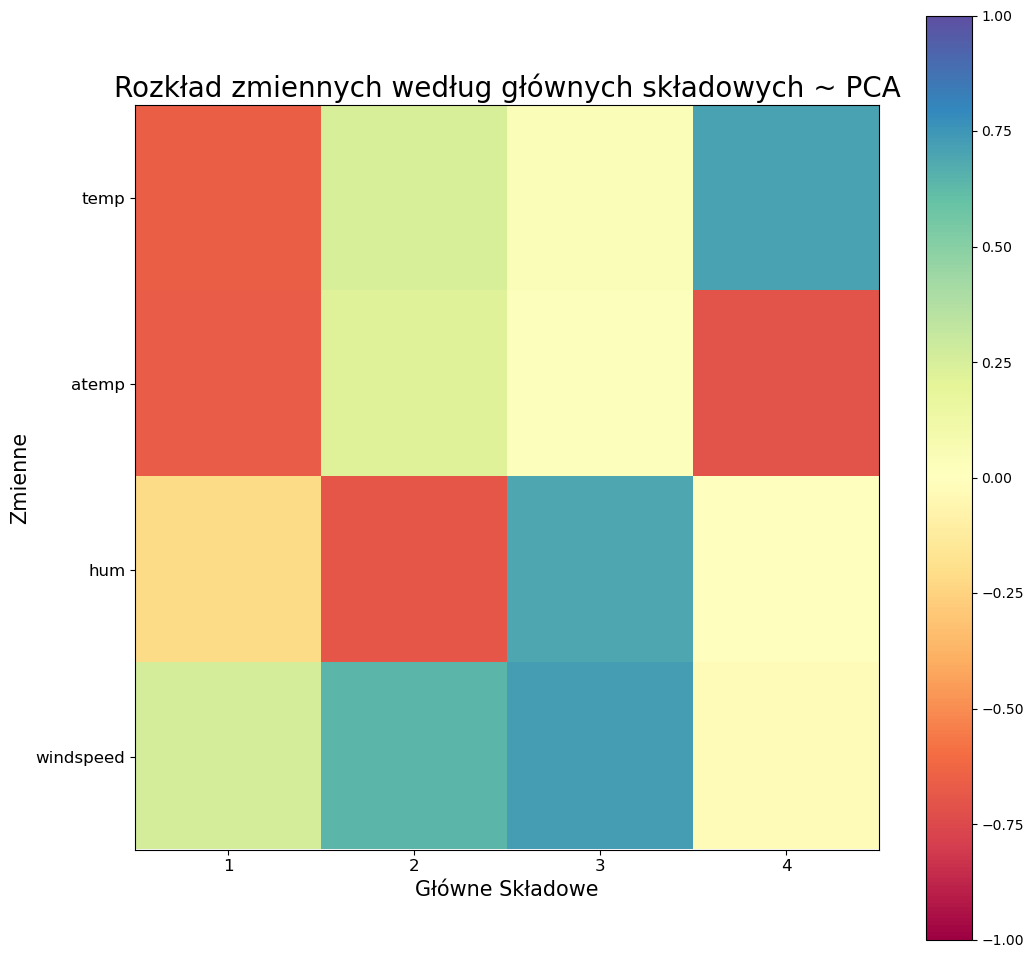

In [9]:
fig, ax = plt.subplots(figsize=(12, 12))
plt.imshow(pca.components_.T, cmap = 'Spectral', vmin =-1, vmax = 1)
plt.yticks(range(len(X_train.columns)), X_train.columns, fontsize=12)
plt.xticks(range(4), range(1, 5), fontsize=12)
plt.xlabel('Główne Składowe', fontsize=15)
plt.ylabel('Zmienne', fontsize=15)
plt.title('Rozkład zmiennych według głównych składowych ~ PCA', fontsize=20)
plt.colorbar()
plt.show()

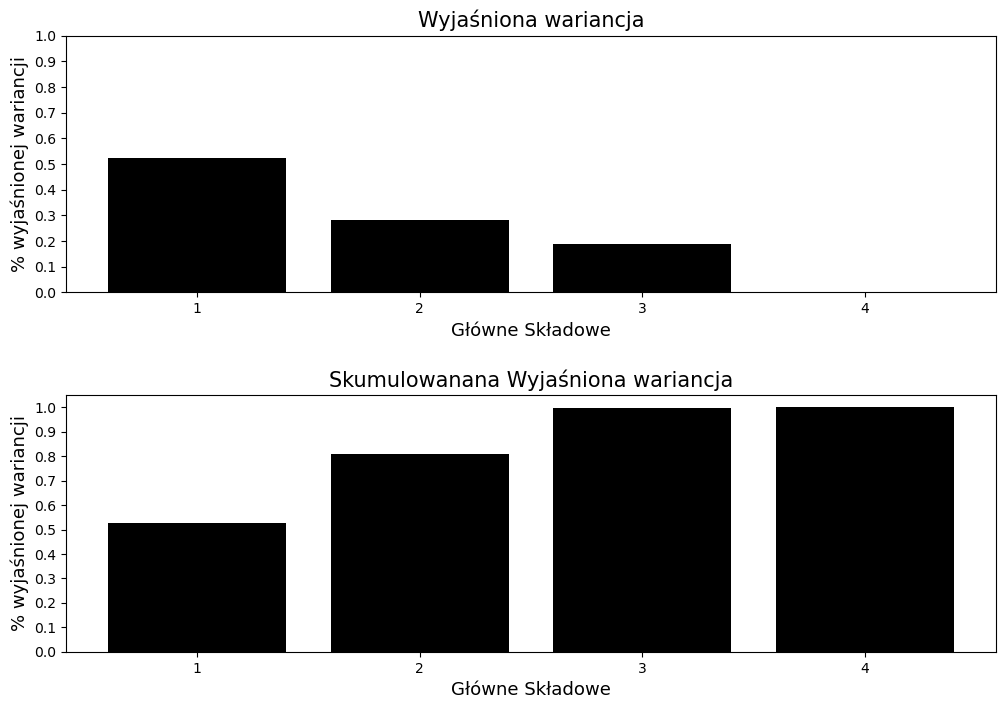

Główna składowa: 1, Wyjaśniona wariancja: 0.52547, Skumulowana Wyjaśniona wariancja: 0.52547
Główna składowa: 2, Wyjaśniona wariancja: 0.28319, Skumulowana Wyjaśniona wariancja: 0.80867
Główna składowa: 3, Wyjaśniona wariancja: 0.18901, Skumulowana Wyjaśniona wariancja: 0.99767
Główna składowa: 4, Wyjaśniona wariancja: 0.00233, Skumulowana Wyjaśniona wariancja: 1.0


In [10]:
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(wspace=.4, hspace=.4)
ax = fig.add_subplot(2, 1, 1)
ax.bar(range(1, 1+pca.n_components_), pca.explained_variance_ratio_, color='black')
ax.set(xticks=[1, 2, 3, 4])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('Wyjaśniona wariancja', fontsize=15)
plt.xlabel('Główne Składowe', fontsize=13)
plt.ylabel('% wyjaśnionej wariancji', fontsize=13)
ax = fig.add_subplot(2, 1, 2)
ax.bar(range(1, 1+pca.n_components_), np.cumsum(pca.explained_variance_ratio_), color='black')
ax.set(xticks=[1, 2, 3, 4])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('Skumulowanana Wyjaśniona wariancja', fontsize=15)
plt.xlabel('Główne Składowe', fontsize=13)
plt.ylabel('% wyjaśnionej wariancji', fontsize=13)
plt.show()

principal_component = 1
cum_explained_var = 0
for explained_var in pca.explained_variance_ratio_:
    cum_explained_var += explained_var
    print(f'Główna składowa: {principal_component}, Wyjaśniona wariancja: {np.round(explained_var, 5)}, Skumulowana Wyjaśniona wariancja: {np.round(cum_explained_var, 5)}')
    principal_component += 1

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from prettytable import PrettyTable
import datetime

# Regression model (Linear Regression)
regressor = LinearRegression()

# Scalers
X_test_scaler = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaler)

# Define a function for training and evaluating the regression model
def train_and_check_regression(Xtrain, Xtest, ytrain, ytest):
    start = datetime.datetime.now()
    regressor.fit(Xtrain, ytrain)
    end = datetime.datetime.now()
    time = (end - start).microseconds
    
    # Make predictions on the test data
    y_pred = regressor.predict(Xtest)
    
    # Calculate regression-specific evaluation metrics (e.g., MAE, MSE)
    mae = mean_absolute_error(ytest, y_pred)
    mse = mean_squared_error(ytest, y_pred)
    
    return mae, mse, time

results = PrettyTable(['Model', 'MAE', 'MSE', 'Training time (microseconds)'])

# Training model on non-pre-processed data
mae_not_scaled, mse_not_scaled, time_not_scaled = train_and_check_regression(X_train, X_test, y_train, y_test)
results.add_row(['Nieskalowane dane', mae_not_scaled, mse_not_scaled, time_not_scaled])

# Training model on pre-processed data
mae_scaled, mse_scaled, time_scaled = train_and_check_regression(X_train_scaler, X_test_scaler, y_train, y_test)
results.add_row(['Skalowane dane', mae_scaled, mse_scaled, time_scaled])

# Training model – PCA 4
mae_pc4, mse_pc4, time_pc4 = train_and_check_regression(X_train_pca, X_test_pca, y_train, y_test)
results.add_row(['4 PC', mae_pc4, mse_pc4, time_pc4])

# Training model – PCA 3
mae_pc3, mse_pc3, time_pc3 = train_and_check_regression(X_train_pca[:, :3], X_test_pca[:, :3], y_train, y_test)
results.add_row(['3 PC', mae_pc3, mse_pc3, time_pc3])

# Training model – PCA 2
mae_pc2, mse_pc2, time_pc2 = train_and_check_regression(X_train_pca[:, :2], X_test_pca[:, :2], y_train, y_test)
results.add_row(['2 PC', mae_pc2, mse_pc2, time_pc2])

# Training model – PCA 1
mae_pc1, mse_pc1, time_pc1 = train_and_check_regression(X_train_pca[:, :1], X_test_pca[:, :1], y_train, y_test)
results.add_row(['1 PC', mae_pc1, mse_pc1, time_pc1])

print(results)

+-------------------+--------------------+--------------------+------------------------------+
|       Model       |        MAE         |        MSE         | Training time (microseconds) |
+-------------------+--------------------+--------------------+------------------------------+
| Nieskalowane dane | 362.35937114089137 | 238050.39136603932 |             4066             |
|   Skalowane dane  | 362.3593711408915  | 238050.39136603934 |             1032             |
|        4 PC       | 362.3593711408915  | 238050.39136603934 |             3015             |
|        3 PC       | 362.3577935903264  | 238045.89713423632 |             2075             |
|        2 PC       | 356.47461791898223 | 240417.9962524838  |             1995             |
|        1 PC       | 366.30036657060725 | 250362.92396616834 |             998              |
+-------------------+--------------------+--------------------+------------------------------+


## Klasyfikacja

In [14]:
import pandas as pd
penguins = pd.read_csv('penguins.csv')
penguins = penguins.fillna(penguins.groupby('Species').transform('mean')) 
penguins

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.100000,18.700000,181.000000,3750.000000,0
1,39.500000,17.400000,186.000000,3800.000000,0
2,40.300000,18.000000,195.000000,3250.000000,0
3,38.791391,18.346358,189.953642,3700.662252,0
4,36.700000,19.300000,193.000000,3450.000000,0
...,...,...,...,...,...
339,55.800000,19.800000,207.000000,4000.000000,2
340,43.500000,18.100000,202.000000,3400.000000,2
341,49.600000,18.200000,193.000000,3775.000000,2
342,50.800000,19.000000,210.000000,4100.000000,2


In [15]:
features = ['CulmenLength','CulmenDepth','FlipperLength','BodyMass']
target = 'Species'
X, y = penguins[features], penguins[target]

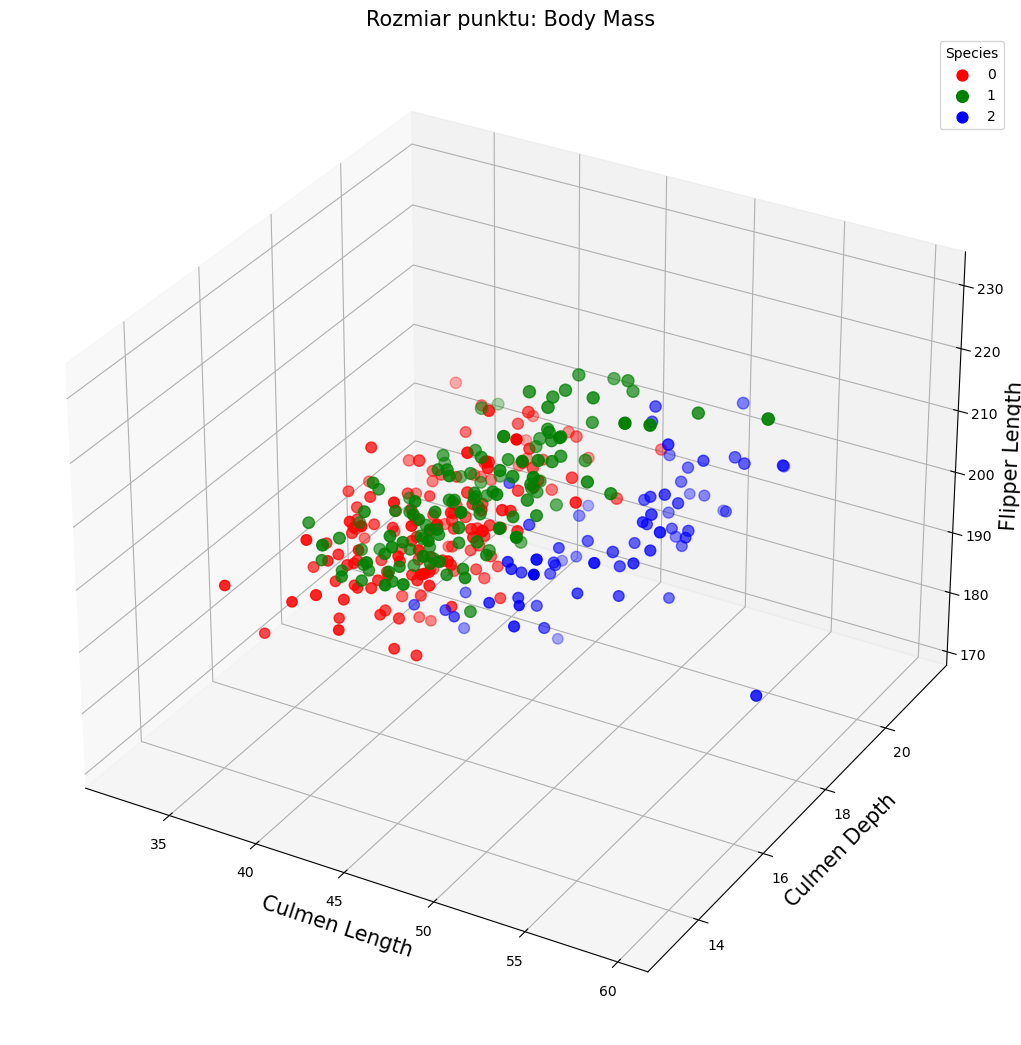

In [31]:
# Wizualizacja

fig = plt.figure(figsize=(13, 13))
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(xs=penguins.loc[penguins['Species']==0, 'CulmenLength'],
                 ys=penguins.loc[penguins['Species']==0,'CulmenDepth'],
                 zs=penguins.loc[penguins['Species']==0, 'FlipperLength'],
                 s=penguins.loc[penguins['Species']==0,'BodyMass']**0.5,
                 c='red', label='0')
img = ax.scatter(xs=penguins.loc[penguins['Species']==1, 'CulmenLength'],
                 ys=penguins.loc[penguins['Species']==1,'CulmenDepth'],
                 zs=penguins.loc[penguins['Species']==1, 'FlipperLength'],
                 s=penguins.loc[penguins['Species']==1,'BodyMass']**0.5,
                 c='green', label='1')
img = ax.scatter(xs=penguins.loc[penguins['Species']==2, 'CulmenLength'],
                 ys=penguins.loc[penguins['Species']==2,'CulmenDepth'],
                 zs=penguins.loc[penguins['Species']==2, 'FlipperLength'],
                 s=penguins.loc[penguins['Species']==2,'BodyMass']**0.5,
                 c='blue', label='2')
ax.set_xlabel(xlabel='Culmen Length', size=15)
ax.set_ylabel(ylabel='Culmen Depth', size=15)
ax.set_zlabel(zlabel='Flipper Length', size=15)
ax.set_title('Rozmiar punktu: Body Mass', size=15)
plt.legend(title='Species')
plt.show()

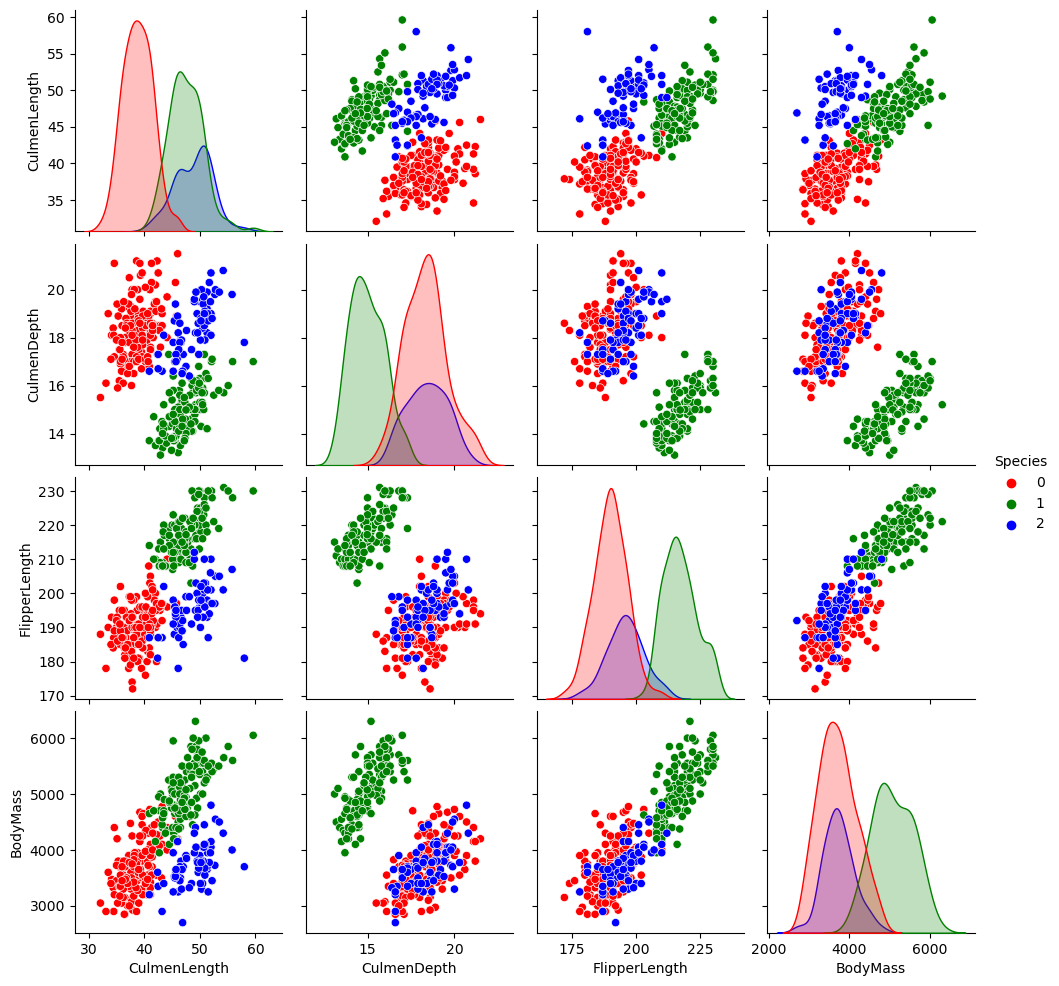

In [34]:
sns.pairplot(penguins,
             hue='Species',
             palette={0: 'red', 1: 'green', 2: 'blue'})
plt.show()

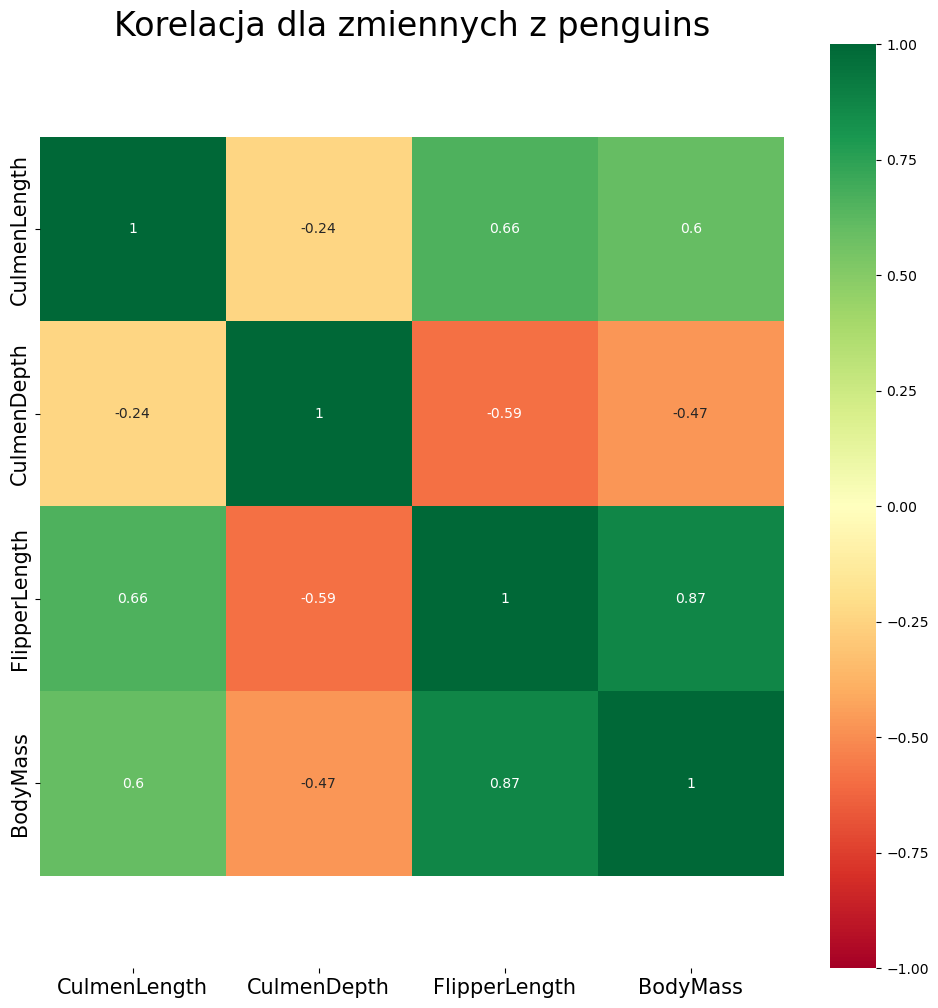

In [37]:
plt.figure(figsize=(12, 12))
ax = sns.heatmap(X.corr(),
                 xticklabels=X.corr().columns,
                 yticklabels=X.corr().columns,
                 cmap='RdYlGn',
                 center=0,
                 annot=True,
                 vmin=-1,
                 vmax= 1)

plt.title('Korelacja dla zmiennych z penguins', fontsize=24)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
pca = PCA(random_state=42)
X_train_pca = pca.fit_transform(X_train_scaler)
train_penguins = pd.DataFrame(np.concatenate([X_train_pca,
                          np.array(y_train).reshape(-1, 1)],
                          axis=1))
train_penguins.rename(columns = {0: 'PC1', 1: 'PC2',
                             2: 'PC3', 3: 'PC4', 4: 'Species'},
                  inplace=True)
train_penguins[['PC1', 'PC2','PC3','PC4']] = train_penguins[['PC1', 'PC2','PC3', 'PC4']].astype(float)
train_penguins.corr()

,PC1,PC2,PC3,PC4,Species
PC1,1.000000e+00,-3.761244e-16,-2.565741e-16,2.150423e-16,0.441598
PC2,-3.761244e-16,1.000000e+00,8.716446e-17,-2.605100e-17,0.366080
PC3,-2.565741e-16,8.716446e-17,1.000000e+00,-7.539046e-17,0.622037
PC4,2.150423e-16,-2.605100e-17,-7.539046e-17,1.000000e+00,-0.002356
Species,4.415979e-01,3.660801e-01,6.220370e-01,-2.356238e-03,1.000000


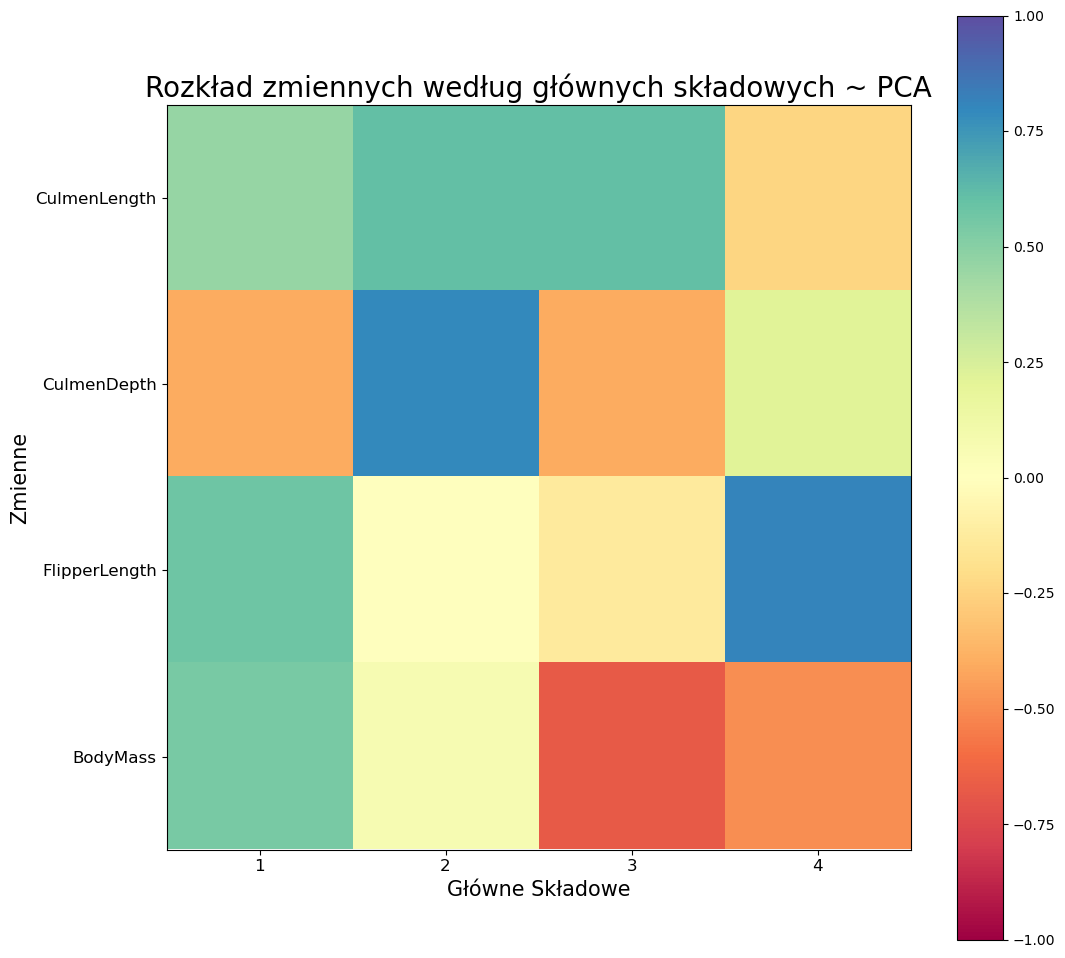

In [39]:
# Grupowanie cech – jakie zmienne przedstawiają tę samą informację

fig, ax = plt.subplots(figsize=(12, 12))
plt.imshow(pca.components_.T, cmap = 'Spectral', vmin =-1, vmax = 1)
plt.yticks(range(len(X_train.columns)), X_train.columns, fontsize=12)
plt.xticks(range(4), range(1, 5), fontsize=12)
plt.xlabel('Główne Składowe', fontsize=15)
plt.ylabel('Zmienne', fontsize=15)
plt.title('Rozkład zmiennych według głównych składowych ~ PCA', fontsize=20)
plt.colorbar()
plt.show()

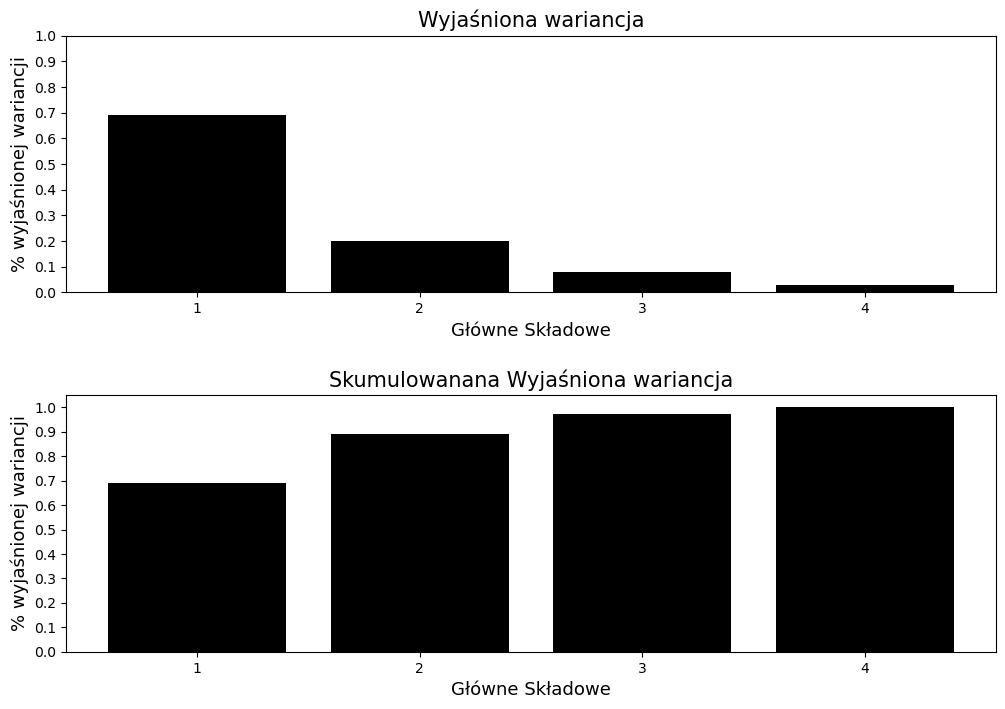

Główna składowa: 1, Wyjaśniona wariancja: 0.6918, Skumulowana Wyjaśniona wariancja: 0.6918
Główna składowa: 2, Wyjaśniona wariancja: 0.19908, Skumulowana Wyjaśniona wariancja: 0.89088
Główna składowa: 3, Wyjaśniona wariancja: 0.08019, Skumulowana Wyjaśniona wariancja: 0.97108
Główna składowa: 4, Wyjaśniona wariancja: 0.02892, Skumulowana Wyjaśniona wariancja: 1.0


In [40]:
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(wspace=.4, hspace=.4)
ax = fig.add_subplot(2, 1, 1)
ax.bar(range(1, 1+pca.n_components_), pca.explained_variance_ratio_, color='black')
ax.set(xticks=[1, 2, 3, 4])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('Wyjaśniona wariancja', fontsize=15)
plt.xlabel('Główne Składowe', fontsize=13)
plt.ylabel('% wyjaśnionej wariancji', fontsize=13)
ax = fig.add_subplot(2, 1, 2)
ax.bar(range(1, 1+pca.n_components_), np.cumsum(pca.explained_variance_ratio_), color='black')
ax.set(xticks=[1, 2, 3, 4])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('Skumulowanana Wyjaśniona wariancja', fontsize=15)
plt.xlabel('Główne Składowe', fontsize=13)
plt.ylabel('% wyjaśnionej wariancji', fontsize=13)
plt.show()

principal_component = 1
cum_explained_var = 0
for explained_var in pca.explained_variance_ratio_:
    cum_explained_var += explained_var
    print(f'Główna składowa: {principal_component}, Wyjaśniona wariancja: {np.round(explained_var, 5)}, Skumulowana Wyjaśniona wariancja: {np.round(cum_explained_var, 5)}')
    principal_component += 1

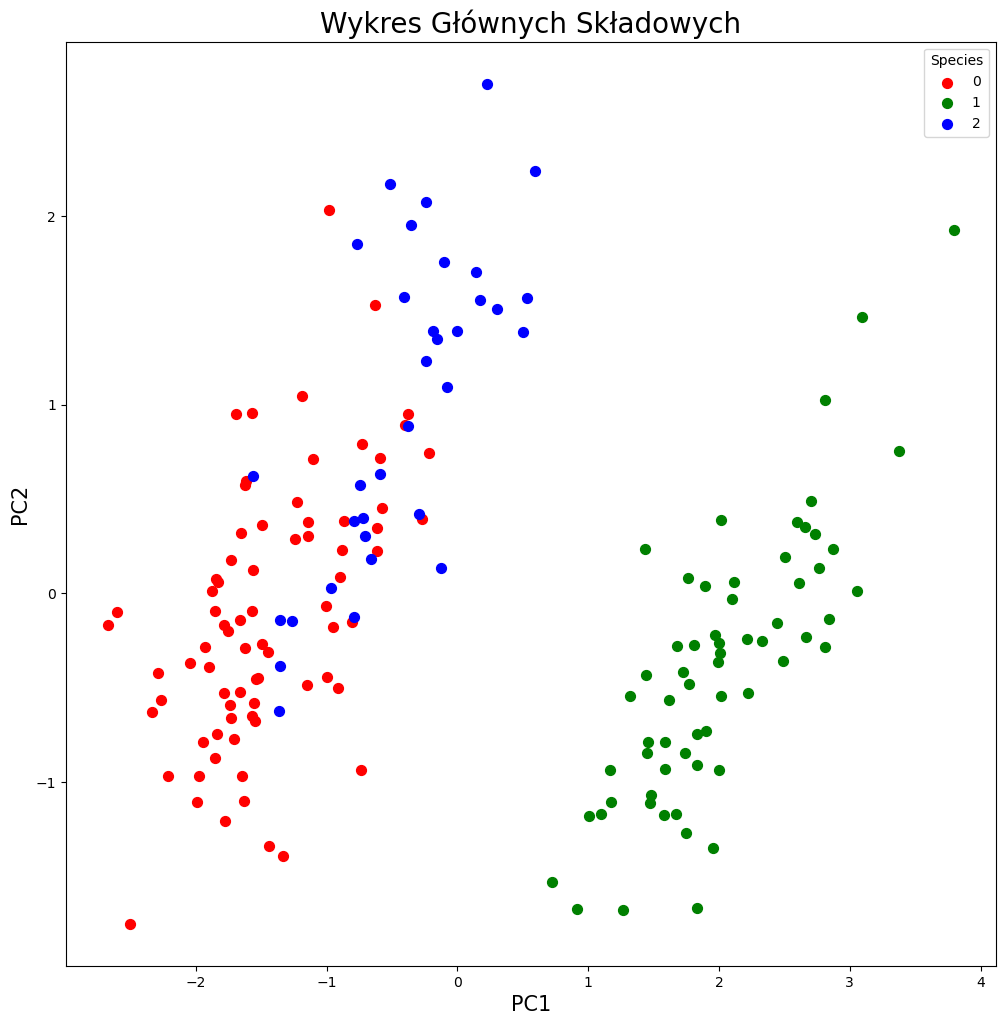

In [44]:
fig = plt.figure(figsize=(12, 12))
plt.scatter(x=train_penguins.loc[train_penguins['Species']==0, 'PC1'],
            y=train_penguins.loc[train_penguins['Species']==0,'PC2'],
            c='red', label='0', s=50)
plt.scatter(x=train_penguins.loc[train_penguins['Species']==1, 'PC1'],
            y=train_penguins.loc[train_penguins['Species']==1,'PC2'],
            c='green', label='1', s=50)
plt.scatter(x=train_penguins.loc[train_penguins['Species']==2, 'PC1'],
            y=train_penguins.loc[train_penguins['Species']==2,'PC2'],
            c='blue', label='2', s=50)
plt.xlabel(xlabel='PC1', size=15)
plt.ylabel(ylabel='PC2', size=15)
plt.title('Wykres Głównych Składowych', size=20)
plt.legend(title='Species')
plt.show()

In [45]:
# Redukcja wymiarowości jako inżyniera cech przed Uczeniem Nadzorowanym

from sklearn.linear_model import LogisticRegression
from prettytable import PrettyTable
import datetime

X_test_scaler = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaler)

def train_and_check(Xtrain, Xtest, ytrain, ytest):
    classifier = LogisticRegression(max_iter=100000)
    start = datetime.datetime.now()
    classifier.fit(Xtrain, ytrain)
    end = datetime.datetime.now()
    time = (end - start).microseconds
    evaluation = np.round(classifier.score(Xtest, ytest), 4)
    return evaluation, time

results = PrettyTable(['Model',
                       'Dokładność',
                       'Czas trenowania (microseconds)'])

# Trenowanie modelu na nieprzetworzonym zbiorze
not_scaled_data = train_and_check(X_train, X_test, y_train, y_test)
results.add_row(['Nieskalowane dane', not_scaled_data[0], not_scaled_data[1]])

# Trenowanie modelu na przetworzonym zbiorze
scaled_data = train_and_check(X_train_scaler, X_test_scaler, y_train, y_test)
results.add_row(['Skalowane dane', scaled_data[0], scaled_data[1]])

# Trenowanie modelu na czterech Głównych Składowych
PC4_data = train_and_check(X_train_pca, X_test_pca, y_train, y_test)
results.add_row(['4 PC', PC4_data[0], PC4_data[1]])

# Trenowanie modelu na trzech Głównych Składowych
PC3_data = train_and_check(X_train_pca[:, :3], X_test_pca[:, :3], y_train, y_test)
results.add_row(['3 PC', PC3_data[0], PC3_data[1]])

# Trenowanie modelu na dwóch Głównych Składowych
PC2_data = train_and_check(X_train_pca[:, :2], X_test_pca[:, :2], y_train, y_test)
results.add_row(['2 PC', PC2_data[0], PC2_data[1]])

# Trenowanie modelu na jednej Głównej Składowej
PC1_data = train_and_check(X_train_pca[:, :1], X_test_pca[:, :1],  y_train, y_test)
results.add_row(['1 PC', PC1_data[0], PC1_data[1]])
print(results)

+-------------------+------------+--------------------------------+
|       Model       | Dokładność | Czas trenowania (microseconds) |
+-------------------+------------+--------------------------------+
| Nieskalowane dane |   0.9942   |             120940             |
|   Skalowane dane  |   0.9942   |              3965              |
|        4 PC       |   0.9942   |              4443              |
|        3 PC       |   0.9942   |              2998              |
|        2 PC       |   0.9128   |              2619              |
|        1 PC       |   0.9244   |              2992              |
+-------------------+------------+--------------------------------+
